In [22]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv('interpolation_corr.csv')

The goal is to look at the correspondence between features with `sim_corr_feat_asked == FALSE` and get the proportion of those that are correct for each animal.
Also to see if the proportion correct correlates with `sum( sim_corr_feat_asked == TRUE )` for each animal.

In [24]:
animals = list( df['animal'].unique() )

In [25]:
# Initialise lists to keep track of quantities.
all_accuracy = []
all_num_questions = []
all_num_interpd = []

# Go through each animal and look at its section of the df.
for animal in animals:
    
    # Maintain only the rows corresponding to current animal
    subdf = df[df['animal'] == animal].drop(columns=['animal'])
    
    # Make the condition column into the index and transpose, so now we have a three-column df
    subdf = subdf.set_index('condition').transpose()
    
    # Count how many times TRUE and FALSE exist in col sim_corr_feat_asked
    num_questions = sum( subdf['sim_corr_feat_asked'] == 'TRUE')
    num_interpd = sum( subdf['sim_corr_feat_asked'] == 'FALSE')
    
    # Filter for where sim_corr_feat_asked is FALSE to get the interpolated values 
    subdf_interpd = subdf[subdf['sim_corr_feat_asked'] == 'FALSE']
    
    # Get the accuracy of the interpolation (number of correct values / total number of values)
    accuracy = np.mean( subdf_interpd['kb_gold_standard'] == subdf_interpd['sim_corr'] ) 
    
    # Append all the values in this loop to the list (index corresponds to the animal index in list animals)
    all_accuracy.append(accuracy)
    all_num_questions.append(num_questions)
    all_num_interpd.append(num_interpd)

In [26]:
print('The average accuracy of this interpolation method is', round( np.mean(all_accuracy) , 3) )

The average accuracy of this interpolation method is 0.77


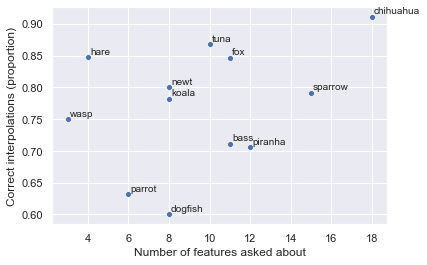

In [27]:
sns.scatterplot(x=all_num_questions, y=all_accuracy)

for idx in range(len(animals)):
    plt.text(all_num_questions[idx]+0.1, # x position
             all_accuracy[idx]+0.005, # y position
             animals[idx]) # text label

plt.xlabel('Number of features asked about')
plt.ylabel('Correct interpolations (proportion)')

plt.savefig('interpolation-eval-corr.pdf', dpi=199)